# Looking at specific paths:

Let's look more closely at forced paths. Can we even project onto the exact points we want to?

In [1]:
import batch_test_latent_sim as bt
import numpy as np
from matplotlib import pylab as plt
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
import tensorflow as tf

In [3]:
def eval_path_via_inversion(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    for s in ss:
        try:
#             pp=p1*(1.0-(np.exp(s)-1)/(np.e-1) )  + p2*((np.exp(s)-1)/(np.e-1))
            pp = np.exp( np.log(p1)*(1.0-s) + np.log(p2)*s )
            print(pp)
            q0 = ls.find_point(T=T1*(1.0-s)+T2*s, 
                               p=pp,
                              under_relax=0.5)
            state = ls.decode(q0)
            states.append(state)
        except Exception as e:
            print(e)
    return np.vstack(states)
def eval_path_via_latent_space(ls, T1,p1, T2,p2):
    states=[]
    ss = np.linspace(0.0,1.0,50)
    q1 = ls.find_point(T=T1, p=p1)
    q2 = ls.find_point(T=T2, p=p2)
    for s in ss:
        try:
            state = ls.decode(q1*(1.0-s)+q2*s)
            states.append(state)
        except Exception as e:
            print(e)
            
    return np.vstack(states)
def eval_path_on_problem(ls,problem,method='inversion'):
    if method=='inversion':
        states = eval_path_via_inversion(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    else:
        states = eval_path_via_latent_space(ls, problem.initial['T'],problem.initial['p'],
                          problem.answer['T'],problem.answer['p'])
    return ls.model_name,states

def scatter_contour(model_name,states,xidx=1,yidx=2):
#     plt.semilogx(states[:,xidx],states[:,yidx],'+-',label=ls.model_name)
    sc = go.Scatter(x=states[:,xidx],y=states[:,yidx],name=model_name)
    return sc
def plot_contours(states):
    scatters = [scatter_contour(m,s) for m,s in states]
    fig = go.Figure(data=scatters,
              layout=go.Layout(
                    xaxis=dict(
                        type='log',
                        autorange=True
                    ),
                    yaxis=dict(
                        autorange=True
                    )
                ))
    return fig


In [14]:
states = []

In [15]:
nets = [
#      'Poly_pT_0_1,5',
#      'Poly_rand_0_1,5',
#      'Poly_rhoh_0_1,5',
     'Poly_pT_0.0_1,5',
#      'Poly_rand_1_1,5',
#      'Poly_rhoh_1_1,5',
#     'Classifying_rand_0.0_1,4,3,3,sigmoid',
#     'Classifying_rand_0.0_1,4,6,12,sigmoid',
#     'Classifying_rand_0.0_1,1,6,12,sigmoid',
#     'Classifying_pT_0.0_1,1,6,12,sigmoid',
#     'Classifying_rhoh_0.0_1,1,6,12,sigmoid',

    
#     'Classifying_rhoh_0.0_1,4,3,3,sigmoid',
#     'Classifying_pT_0.0_1,4,3,3,sigmoid',
]
for n in nets:
    ls = bt.curried_latentssim('water_lg',n)
    st = eval_path_on_problem(ls,bt.Transition_L2G,method='inversion')
    states.append(st)
nets = [
#      'Classifying_2,3,12,24,sigmoid',
#      'Classifying_2,4,12,24,sigmoid (1)',
#      'Classifying_1,5,6,12,sigmoid'
]

for n in nets:
    ls = bt.curried_latentssim('water_slgc_logp_64',n)
    st = eval_path_on_problem(ls,bt.Transition_L2G,method='inversion')
    states.append(st)
    

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0.0_1,5/final_variables
499999.9999999997
455149.0889957608
414321.3864273414
377156.0031677309
343324.4225021501
312527.59626369877
284493.30145091447
258973.73396156073
235743.31817286988
214596.71300643872
195346.99685273072
177824.01531115637
161872.87714088216
147352.58512759052
134134.7897639863
122102.6547274328
111149.82412630998
101179.4823862579
92103.49846633588
83841.64684055049
76320.89835876162
69474.77471865684
63242.760842764896
57569.76996632236
52405.65670773429
47704.77381749971
43425.56868756765
39530.21605453852
35984.28365005762
32756.427842977573
29818.116582973194
27143.377196619287
24708.56680661921
22492.163344847224
20474.575311902125
18637.968601574736
16966.108859476648
15444.217982387412
14058.843489871162
12797.73961349769
11649.759052576872
10604.754439600967
9653.488644416264
8787.553124273973
7999.293598030305
7281.7423875062195
6628.556827950547
6033.9

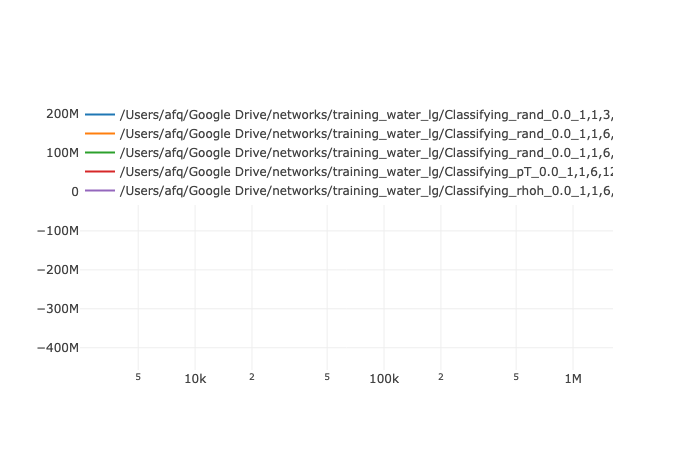

In [13]:
py.iplot(plot_contours(states))

# Finding a point on the equilibria

In [6]:
states = []
nets = [
     'Poly_pT_0_1,5',
    #'Classifying_pT_0_1,3,6,12,sigmoid'
]
for n in nets:
    ls = bt.curried_latentssim('water_lg',n)


INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0_1,5/final_variables


In [7]:
%debug
ls.find_point(T=300,rho=500,under_relax=0.5)

ERROR:root:No traceback has been produced, nothing to debug.


array([[-0.72353263, -0.6154211 ]])